# Test plotting utilities

In [1]:
import numpy as np
from bioslds.plotting import FigureManager, show_latent

/Users/ttesileanu/.virtualenvs/bio_time_series/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## `FigureManager`

### Tight layout is on by default

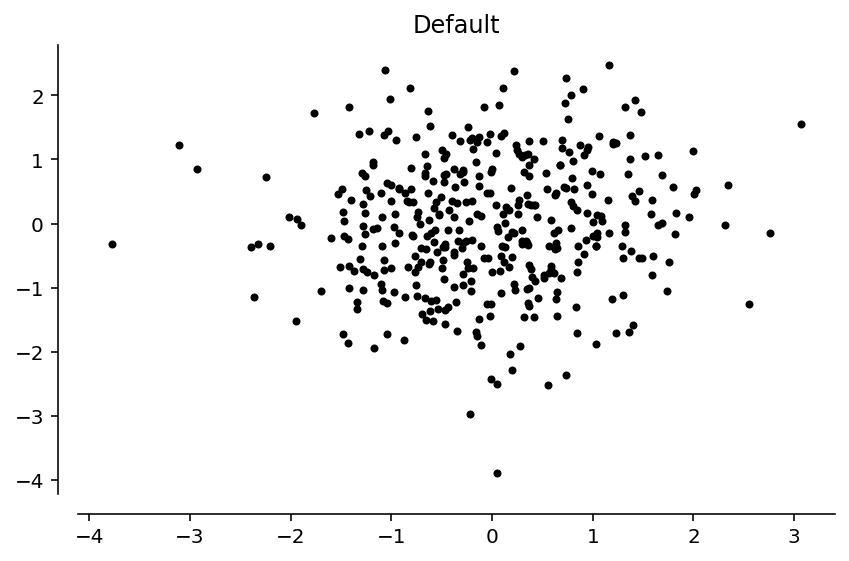

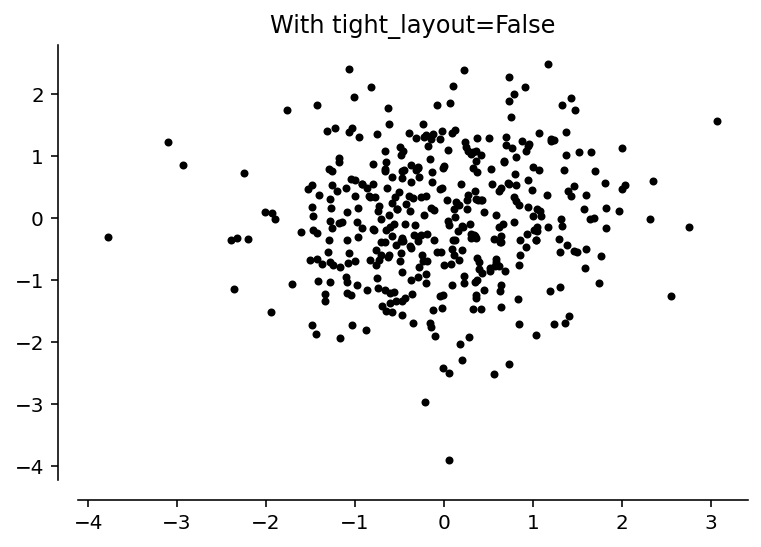

In [2]:
rng = np.random.default_rng(0)
x = rng.normal(size=400)
y = rng.normal(size=400)
with FigureManager() as (fig, ax):
    ax.plot(x, y, '.k')
    ax.set_title("Default")
with FigureManager(tight_layout=False) as (fig, ax):
    ax.plot(x, y, '.k')
    ax.set_title("With tight_layout=False")

### Constrained layout overrides tight layout

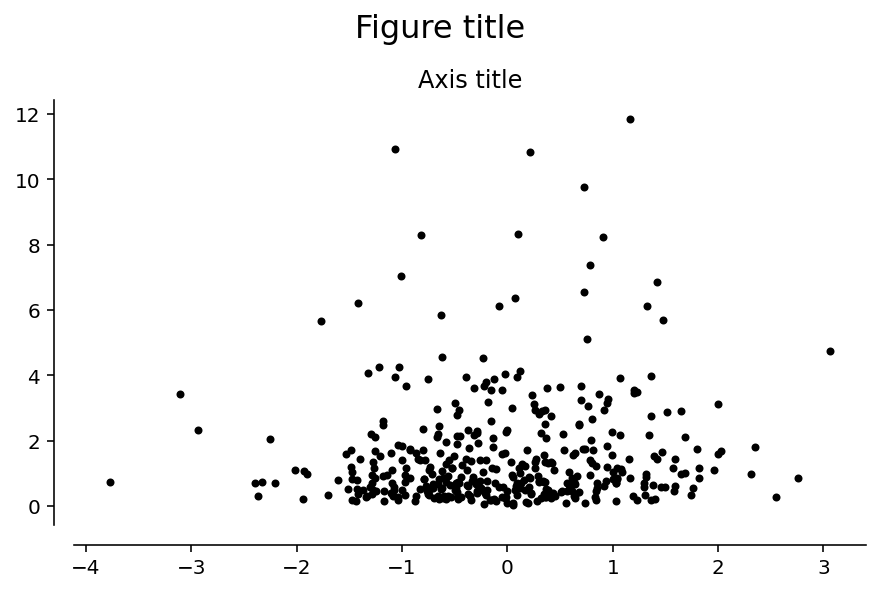

In [3]:
rng = np.random.default_rng(0)
with FigureManager(constrained_layout=True) as (fig, ax):
    ax.plot(rng.normal(size=400), rng.lognormal(size=400), '.k')
    ax.set_title("Axis title")
    fig.suptitle("Figure title", fontsize=16)

### Setting number of supplots and changing `despine` options

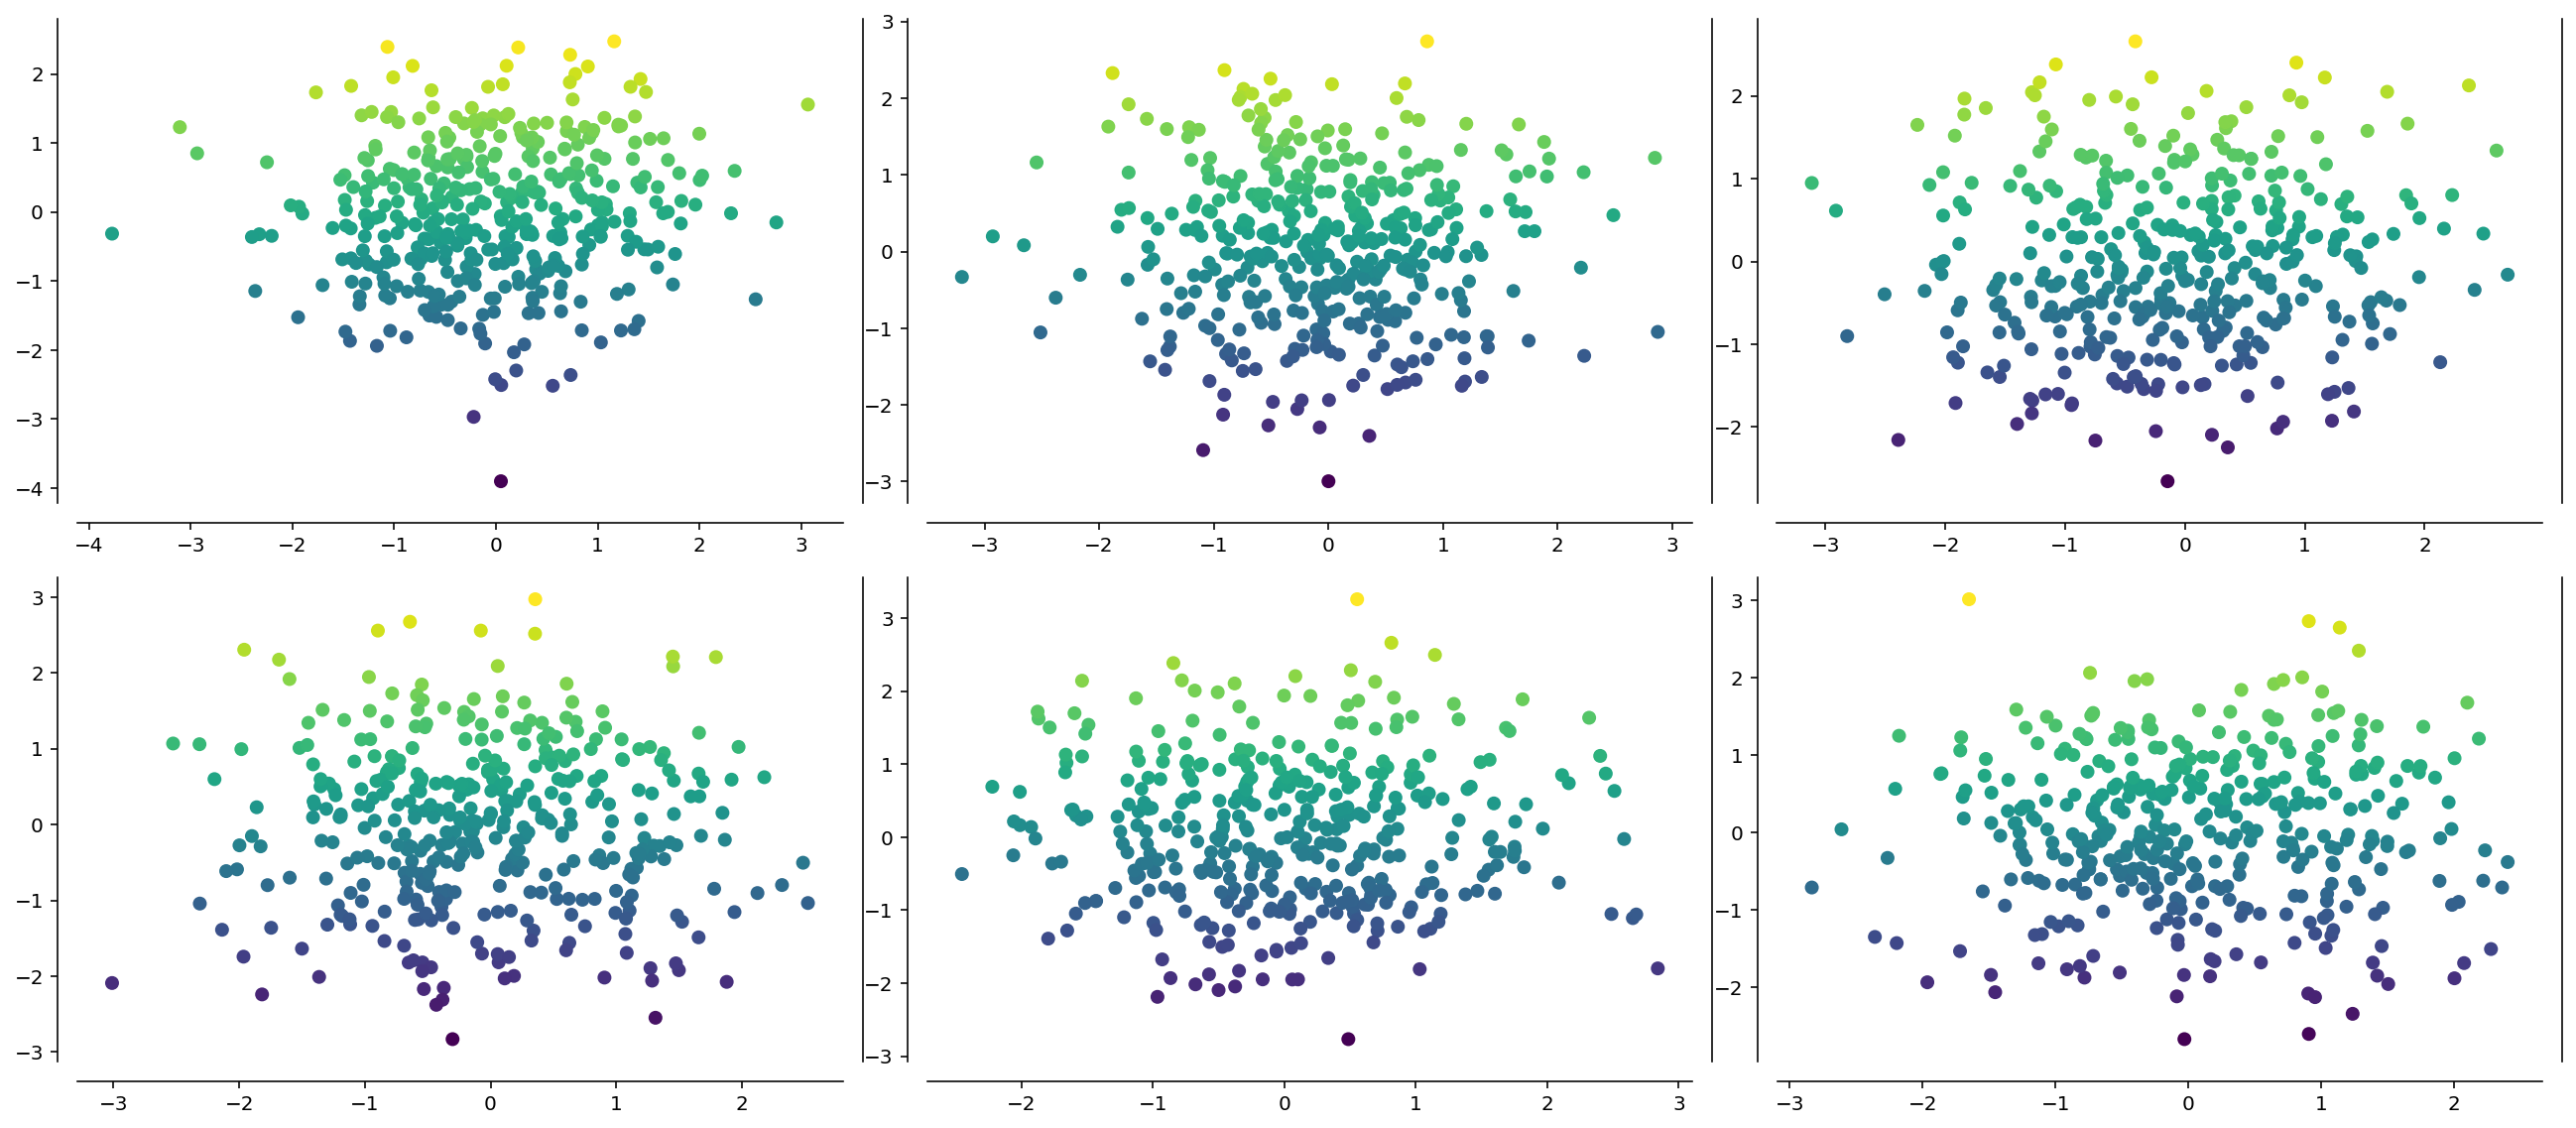

In [4]:
rng = np.random.default_rng(0)
with FigureManager(2, 3, despine_kws={"right": False}) as (_, axs):
    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            ax = axs[i, j]
            x = rng.normal(size=400)
            y = rng.normal(size=400)
            ax.scatter(x, y, c=y)

## `show_latent`

### With default parameters

In [5]:
latent = np.repeat([0, 1, 2, 0, 2, 1], 30)

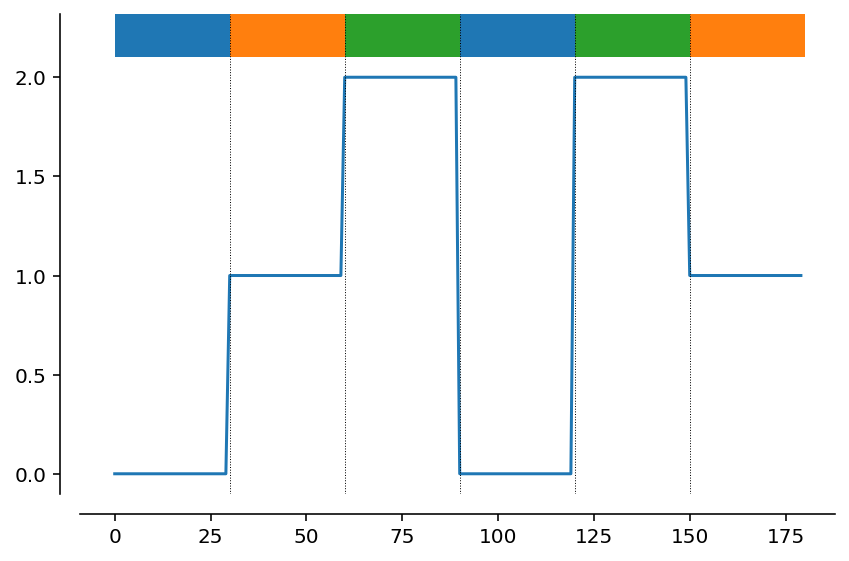

In [6]:
with FigureManager() as (_, ax):
    ax.plot(latent)
    show_latent(latent)

### With various parameters altered

In [7]:
latent = np.repeat([0, 2, 1, 0, 3, 1, 2], 25)

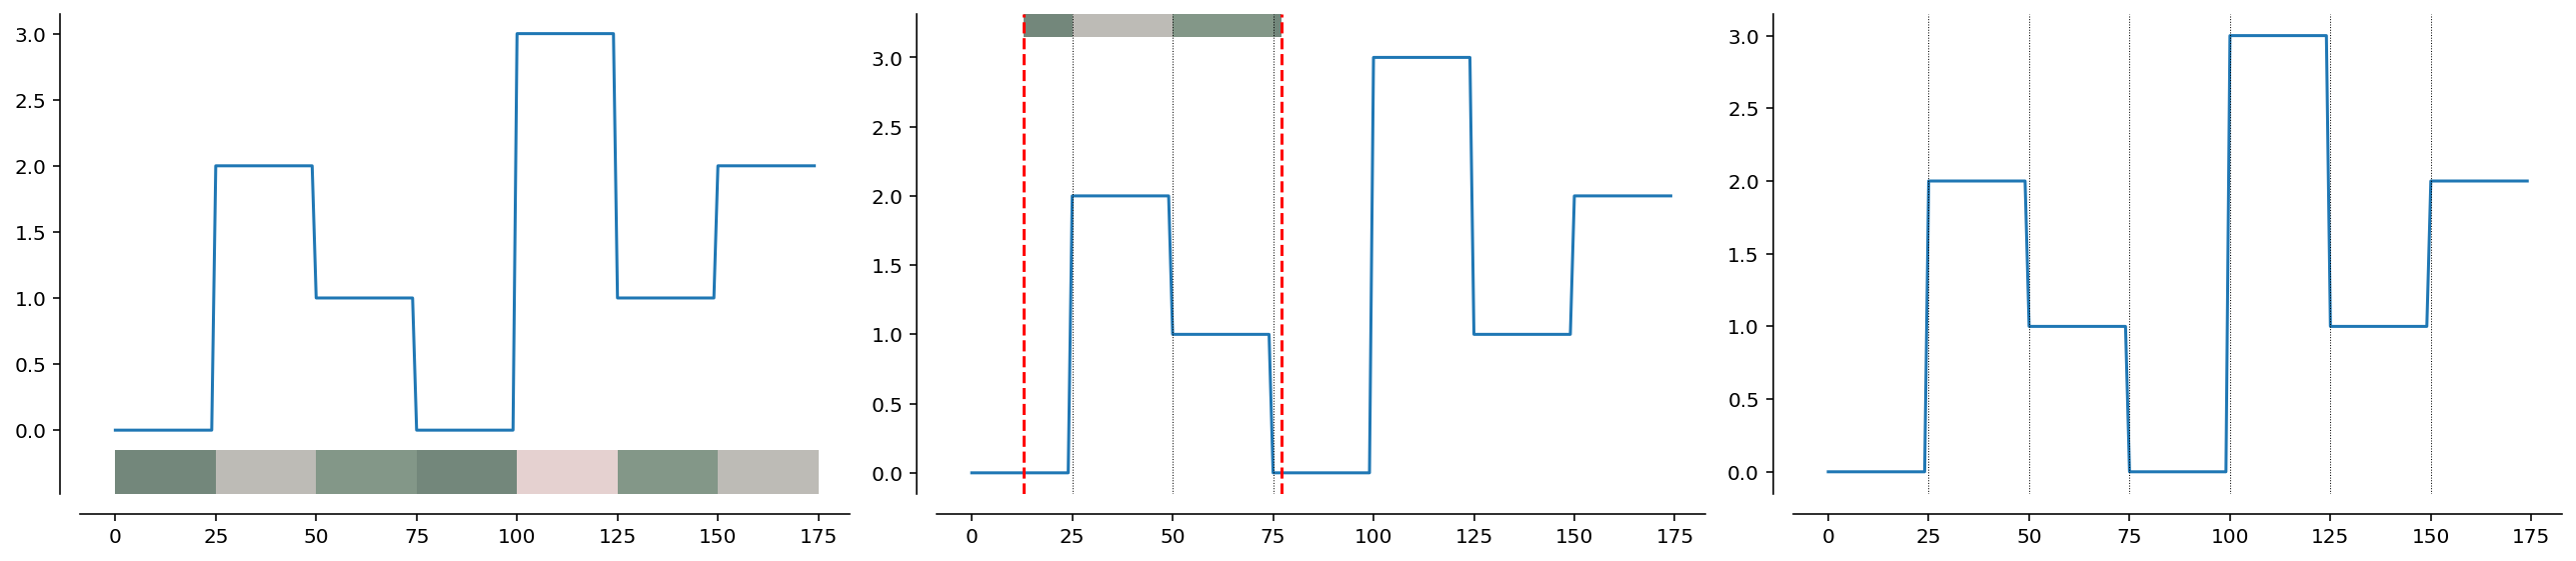

In [8]:
other_colors = ["#73877B", "#839788", "#BDBBB6", "#E5D1D0"]
with FigureManager(1, 3) as (_, (ax1, ax2, ax3)):
    ax1.plot(latent)
    show_latent(latent, ax=ax1, show_vlines=False, bar_location="bottom", colors=other_colors)
    
    ax2.plot(latent)
    crt_bounds = (13, 77)
    show_latent(latent, ax=ax2, bar_width=0.05, colors=other_colors, bounds=crt_bounds)
    ax2.axvline(crt_bounds[0], ls="--", c="r")
    ax2.axvline(crt_bounds[1], ls="--", c="r")
    
    ax3.plot(latent)
    show_latent(latent, ax=ax3, show_bars=False)